In [23]:
from sklearn import svm,datasets
from pandas.io.parsers import read_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from scipy import stats
from nested_dict import nested_dict
from pyfasta import Fasta

In [24]:
def read_icshape_out(out=None, pureID=1):
	out_dict = nested_dict()
	with open(out, 'r') as OUT:
		for line in OUT:
			line = line.strip()
			if not line or line.startswith('#'): continue
			arr = line.split('\t')
			tx_id = arr[0]
			if pureID:
				tx_id = tx_id.split('.')[0]
			length = int(arr[1])
			rpkm = float(arr[2])
			reactivity_ls = arr[3:]
			out_dict[tx_id]['tx_id'] = tx_id
			out_dict[tx_id]['length'] = length
			out_dict[tx_id]['rpkm'] = rpkm
			out_dict[tx_id]['reactivity_ls'] = reactivity_ls
	return out_dict

In [25]:
out_dict_kethoxal_rRNA = read_icshape_out('in_vivo_mRNA_kethoxal.newrRNA.T2t100.out')

kethoxal = out_dict_kethoxal_rRNA['18S']['reactivity_ls']
kethoxal = [np.nan if i == 'NULL' else float(i) for i in kethoxal]
kethoxal_df = pd.DataFrame({'x':kethoxal})

In [26]:
#data import
icshape_125 = pd.read_csv('./ml/icshape.125-r1.18s.list',header=None,names=['x'])
score_125 = pd.read_csv('./ml/score.NAIN3-125-r1.T2t200.18s.list',header=None,names=['x'])
score_125_t500 = pd.read_csv('./ml/score.NAIN3-125-r1.T2t500.18s.list',header=None,names=['x'])
score_125_ext70 = pd.read_csv('./ml/score.NAIN3-125-r1.ex70.T2t200.18s.list',header=None,names=['x'])
score_125_ext150 = pd.read_csv('./ml/score.NAIN3-125-r1.ex150.T2t200.18s.list',header=None,names=['x'])
# icshape_paris = pd.read_csv('./ml/invivo.icSHAPE.18s.na.list',header=None,names=['x'])
icshape_paris = pd.read_csv('./ml/18S.invivo.icSHAPE.new.color',header=None,names=['x'])
#score_paris = pd.read_csv('../score.invivo.target.rRNA.t200.18S.na.list',header=None,names=['x'])
# icshape_sl_cy = pd.read_csv('./ml/icSHAPE.1.18s.na.list',header=None,names=['x'])
standard = pd.read_csv('./ml/human_18s_con.ct.color',header=None,names=['x'])
accessibility = read_table('./ml/18s_o2_sasa.sort.txt',header=None)
#standard = pd.read_csv('../../human_18s_con.ct',header=None,sep='\t')[2]
#flist = ['icshape_25','ml_125','ml_25','ml_125_t500','ml_125_t700','icshape_paris','icshape_sl']
X_test = [icshape_125,score_125,score_125_t500,score_125_ext70,score_125_ext150,icshape_paris, kethoxal_df]
y = standard
accessibility.columns = ['a','b','c']
#accessibility['a']
y.head(), y.shape

(     x
 0  1.0
 1  1.0
 2  1.0
 3  0.5
 4  0.5, (1869, 1))

In [27]:
fa_dict = Fasta('./ribosomalRNAindex/human.18s_rRNA.fa', key_fn=lambda key:key.split("\t")[0])
len(fa_dict['18S']), fa_dict['18S'][0:]

(1869,
 u'TACCTGGTTGATCCTGCCAGTAGCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTGAGTACGCACGGCCGGTACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATGGTTCCTTTGGTCGCTCGCTCCTCTCCTACTTGGATAACTGTGGTAATTCTAGAGCTAATACATGCCGACGGGCGCTGACCCCCTTCGCGGGGGGGATGCGTGCATTTATCAGATCAAAACCAACCCGGTCAGCCCCTCTCCGGCCCCGGCCGGGGGGCGGGCGCCGGCGGCTTTGGTGACTCTAGATAACCTCGGGCCGATCGCACGCCCCCCGTGGCGGCGACGACCCATTCGAACGTCTGCCCTATCAACTTTCGATGGTAGTCGCCGTGCCTACCATGGTGACCACGGGTGACGGGGAATCAGGGTTCGATTCCGGAGAGGGAGCCTGAGAAACGGCTACCACATCCAAGGAAGGCAGCAGGCGCGCAAATTACCCACTCCCGACCCGGGGAGGTAGTGACGAAAAATAACAATACAGGACTCTTTCGAGGCCCTGTAATTGGAATGAGTCCACTTTAAATCCTTTAACGAGGATCCATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGCCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCCGAGCCGCCTGGATACCGCAGCTAGGAATAATGGAATAGGACCGCGGTTCTATTTTGTTGGTTTTCGGAACTGAGGCCATGATTAAGAGGGACGGCCGGGGGCATTCGTATTGCGCCGCTAGAGGTGAAATTCTTGGACCGGCGCAAGACGGACCA

In [28]:
fa_dict['18S'][0:].count('G')

550

In [41]:
DSSR_18S_combine = 'DSSR_18S_combine.txt'
DSSR_df = pd.read_csv(DSSR_18S_combine, sep="\t", header=None, names=['a', 'b', 'x', 'd', 'e'])
DSSR_df.index = DSSR_df['a']
nan_df = pd.DataFrame([np.nan]*1869, index=range(1, 1869 +1))
DSSR_df = pd.merge(nan_df, DSSR_df, left_index=True, right_index=True, how='left')[['a', 'b', 'x']]
print len(DSSR_df), DSSR_df.head()

standard_dssr = DSSR_df[['x']]
y=standard_dssr

print y.head(), y.shape, y.x.unique()

1869    a  b  x
1  1  U  1
2  2  A  1
3  3  C  1
4  4  C  0
5  5  U  0
   x
1  1
2  1
3  1
4  0
5  0 (1869, 1) [ 1.  0. nan]


In [31]:
pdb_sasa_file = './ml/human_allbase_o2.sr4.new.txt'
sa_df = pd.read_csv(pdb_sasa_file, sep="\t", header=None, names=['a', 'b', 'c'])
sa_df.index = sa_df['a']
nan_df = pd.DataFrame([np.nan]*len(standard), index=range(1, len(standard) +1))
sa_df = pd.merge(nan_df, sa_df, left_index=True, right_index=True, how='left')[['a', 'b', 'c']]
print len(sa_df),sa_df



1869          a    b         c
1        1    U  0.000000
2        2    A  0.000000
3        3    C  0.000000
4        4    C  0.000000
5        5    U  0.000000
6        6    G  0.000000
7        7    G  0.000000
8        8    U  0.000000
9        9    U  0.000000
10      10    G  0.000000
11      11    A  0.000000
12      12    U  0.000000
13      13    C  0.000000
14      14    C  0.000000
15      15    U  0.000000
16      16    G  0.000000
17      17    C  0.000000
18      18    C  0.000000
19      19    A  0.000000
20      20    G  0.000000
21      21    U  0.000000
22      22    A  0.000000
23      23    G  0.000000
24      24    C  0.000000
25      25    A  0.000000
26      26    U  0.000000
27      27  A2M  0.000000
28      28    U  0.000000
29      29    G  0.000000
30      30    C  0.000000
...    ...  ...       ...
1840  1840    U  0.000000
1841  1841    C  4.812782
1842  1842  4AC  0.000000
1843  1843    G  0.000000
1844  1844    U  0.000000
1845  1845    A  0.000000
1846  1

                x    y           a
count  899.000000  899  899.000000
mean     0.112034    1    7.786869
std      0.228162    0   17.752747
min      0.000000    1    0.000000
25%      0.007000    1    0.000000
50%      0.032000    1    0.000000
75%      0.088000    1    1.764000
max      1.000000    1   99.858000
                x    y           a
count  787.000000  787  787.000000
mean     0.091640    0    5.937180
std      0.198696    0   15.020157
min      0.000000    0    0.000000
25%      0.004000    0    0.000000
50%      0.029000    0    0.000000
75%      0.074000    0    0.621000
max      1.000000    0   87.974000


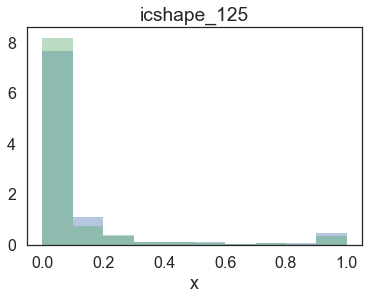

                x    y           a
count  911.000000  911  911.000000
mean     0.158988    1    7.684297
std      0.219298    0   17.657664
min      0.009865    1    0.000000
25%      0.038374    1    0.000000
50%      0.081666    1    0.000000
75%      0.166931    1    1.320000
max      1.000000    1   99.858000
                x    y           a
count  810.000000  810  810.000000
mean     0.150160    0    5.790477
std      0.211774    0   14.836004
min      0.009865    0    0.000000
25%      0.036097    0    0.000000
50%      0.076849    0    0.000000
75%      0.160733    0    0.577000
max      1.000000    0   87.974000


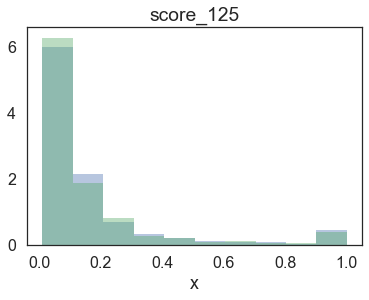

                x    y           a
count  911.000000  911  911.000000
mean     0.159007    1    7.684297
std      0.219285    0   17.657664
min      0.010317    1    0.000000
25%      0.038374    1    0.000000
50%      0.081666    1    0.000000
75%      0.166931    1    1.320000
max      1.000000    1   99.858000
                x    y           a
count  806.000000  806  806.000000
mean     0.150885    0    5.807331
std      0.212048    0   14.868008
min      0.010317    0    0.000000
25%      0.036565    0    0.000000
50%      0.077569    0    0.000000
75%      0.160771    0    0.577000
max      1.000000    0   87.974000


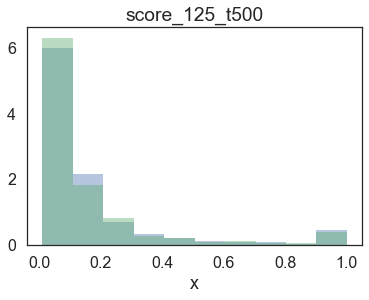

                x    y           a
count  907.000000  907  907.000000
mean     0.165174    1    7.718186
std      0.221320    0   17.689201
min      0.012305    1    0.000000
25%      0.042312    1    0.000000
50%      0.088774    1    0.000000
75%      0.174517    1    1.493500
max      1.000000    1   99.858000
                x    y           a
count  795.000000  795  795.000000
mean     0.155989    0    5.887684
std      0.213879    0   14.954815
min      0.012305    0    0.000000
25%      0.038307    0    0.000000
50%      0.080598    0    0.000000
75%      0.167372    0    0.599000
max      1.000000    0   87.974000


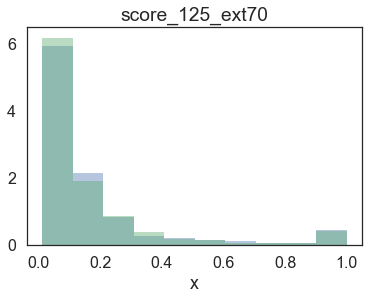

                x    y           a
count  907.000000  907  907.000000
mean     0.172406    1    7.718186
std      0.223010    0   17.689201
min      0.013805    1    0.000000
25%      0.046996    1    0.000000
50%      0.096126    1    0.000000
75%      0.182031    1    1.493500
max      1.000000    1   99.858000
                x    y           a
count  795.000000  795  795.000000
mean     0.163831    0    5.887684
std      0.219747    0   14.954815
min      0.013805    0    0.000000
25%      0.045738    0    0.000000
50%      0.087830    0    0.000000
75%      0.164644    0    0.599000
max      1.000000    0   87.974000


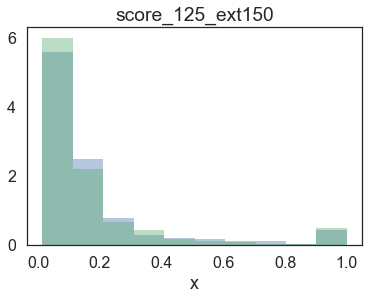

1869 1869
                x    y           a
count  267.000000  267  267.000000
mean     0.096981    1    9.911019
std      0.176231    0   19.335290
min      0.000000    1    0.000000
25%      0.003000    1    0.000000
50%      0.029000    1    0.000000
75%      0.105500    1    5.775500
max      1.000000    1   86.462000
                x    y           a
count  226.000000  226  226.000000
mean     0.099000    0    6.349088
std      0.207909    0   15.754750
min      0.000000    0    0.000000
25%      0.000000    0    0.000000
50%      0.022000    0    0.000000
75%      0.094000    0    0.678500
max      1.000000    0   87.697000


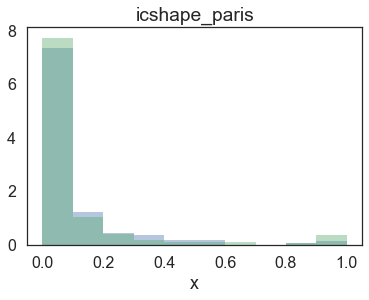

1869 1869
                x    y           a
count  267.000000  267  267.000000
mean     0.384442    1    9.911019
std      0.308600    0   19.335290
min      0.000000    1    0.000000
25%      0.157000    1    0.000000
50%      0.269000    1    0.000000
75%      0.528500    1    5.775500
max      1.000000    1   86.462000
                x    y           a
count  226.000000  226  226.000000
mean     0.380633    0    6.349088
std      0.317567    0   15.754750
min      0.000000    0    0.000000
25%      0.141250    0    0.000000
50%      0.267500    0    0.000000
75%      0.550750    0    0.678500
max      1.000000    0   87.697000


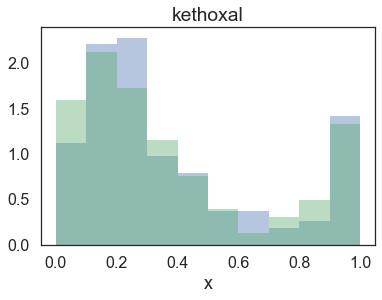

In [42]:
#fpr1,tpr1,_ = roc_curve(y, X1)
#roc_auc1 = auc(fpr1, tpr1)
filelist =['icshape_125','score_125','score_125_t500','score_125_ext70','score_125_ext150','icshape_paris', 'kethoxal']

fpr_list = []
tpr_list = []
roc_auc_list = []
#x_dic = {}
for i in range(len(X_test)):
    #print(i,X_test[i])
    #X_test[i]['y'] = pd.Series(y)
    X_test[i]['y'] = y
    X_test[i]['a'] = pd.Series(accessibility['c'])
#     X_test[i]['a'] = pd.Series(sa_df['c'])
    if filelist[i] in ['icshape_paris', 'kethoxal']:
        print len(X_test[i]['a']), len(list(fa_dict['18S'][0:]))
        X_test[i]['base'] = list(fa_dict['18S'][0:])
    X_select = X_test[i].dropna()
    X_select = X_select[X_select.a>=0]

#     def label(x):
#         if x['y'] == 0:
#             return 0
#         elif x['y'] == 1 and x['a'] >2.5:
#             return 1
#         else:
#             return np.nan
#     X_select['label'] = X_select.apply(label, axis=1)
    
    X_select = X_select.dropna()
    X_select = X_select[X_select['y']!=0.5]
    X_select = X_select[X_select['x']>=0 ]
    if filelist[i] in ['icshape_paris', 'kethoxal']:
        X_select = X_select[X_select['base'] == 'G' ]
    #print(X_select['y'])
    #fpr,tpr,_ = roc_curve(X_clean['y'],X_clean['x'])
    fpr,tpr,_ = roc_curve(X_select['y'],X_select['x'])
    ml_125_ss = X_select[X_select.y==1]
    ml_125_ds = X_select[X_select.y==0]
    print(ml_125_ss.describe())
    print(ml_125_ds.describe())
    sns.distplot(ml_125_ss.dropna()['x'],norm_hist=True,kde=False, bins=10)
    sns.distplot(ml_125_ds.dropna()['x'],norm_hist=True,kde=False, bins=10)
    plt.title(filelist[i])
    plt.show()
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(auc(fpr_list[i],tpr_list[i]))

0
1
2
3
4
5
6


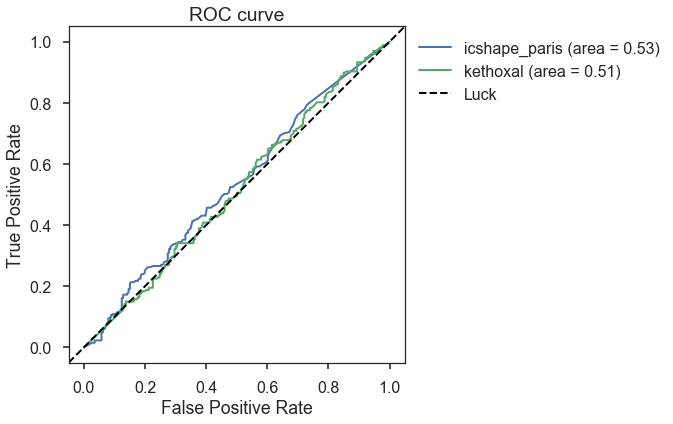

In [43]:
plt.figure()
lw = 2
#plt.plot(fpr1, tpr1, color='darkorange',
#         lw=lw, label='icshape_reactivity (area = %0.2f)' % roc_auc1)
#color = ['red','orange','green','purple','blue','black','yellow']
# filelist =['icshape_125','score_125','score_125_t500','score_125_ext70','score_125_ext150','icshape_paris','icshape_sl_cy']
with sns.axes_style("ticks"):
    fig,ax=plt.subplots(figsize=(6,6))
for i in range(len(X_test)):
    print (i)
    if i < 5:
        continue
    plt.plot(fpr_list[i],tpr_list[i],lw = lw,label = '%s (area = %0.2f)' %(filelist[i],roc_auc_list[i]))
plt.plot([-0.05, 1.05], [-0.05, 1.05], color='black', lw=lw, linestyle='--',label='Luck')
ax.axis('square')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
# plt.show()
plt.tight_layout()
plt.savefig('human_18S.pdf')

In [ ]:
ml_125_ss = ml_125[ml_125.y==1]
ml_125_ds = ml_125[ml_125.y==0]
sns.distplot(ml_125_ss.dropna()['x'],norm_hist=True,kde=False, bins=20,fit=stats.beta)
sns.distplot(ml_125_ds.dropna()['x'],norm_hist=True,kde=False, bins=20,fit=stats.beta)
plt.show()